In [1]:
import pandas as pd
import networkx as nx
import plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [6]:
# load data
kaminski_edges = pd.read_csv('../data/kaminski_edges.csv')
lay_edges = pd.read_csv('../data/lay_edges.csv')
skilling_edges = pd.read_csv('../data/skilling_edges.csv')

In [14]:
kaminski_edges

,sender,recipient,num_emails
0,vince.kaminski@enron.com,vince.kaminski@enron.com,4571
1,vince.kaminski@enron.com,vkaminski@aol.com,2754
2,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1450
3,vince.kaminski@enron.com,stinson.gibner@enron.com,712
4,j.kaminski@enron.com,vkaminski@aol.com,591
...,...,...,...
1132,j.kaminski@enron.com,laura.luce@enron.com,1
1133,j.kaminski@enron.com,kristin.walsh@enron.com,1
1134,j.kaminski@enron.com,khymberly.booth@enron.com,1
1135,j.kaminski@enron.com,kevin.golden@enron.com,1


In [15]:
lay_edges

,sender,recipient,num_emails
0,kenneth.lay@enron.com,l..wells@enron.com,7
1,kenneth.lay@enron.com,k..allen@enron.com,5
2,kenneth.lay@enron.com,tim.belden@enron.com,4
3,kenneth.lay@enron.com,cindy.olson@enron.com,4
4,kenneth.lay@enron.com,sherri.sera@enron.com,4
...,...,...,...
1048,kenneth.lay@enron.com,marina.titova@enron.com,1
1049,kenneth.lay@enron.com,maria.tefel@enron.com,1
1050,kenneth.lay@enron.com,maria.arefieva@enron.com,1
1051,kenneth.lay@enron.com,marcus.edmonds@enron.com,1


In [16]:
skilling_edges

,sender,recipient,num_emails
0,jeff.skilling@enron.com,sherri.sera@enron.com,18
1,jeff.skilling@enron.com,joannie.williamson@enron.com,13
2,jeff.skilling@enron.com,christie.patrick@enron.com,7
3,jeff.skilling@enron.com,kevin.hannon@enron.com,6
4,jeff.skilling@enron.com,david.delainey@enron.com,5
...,...,...,...
812,jeff.skilling@enron.com,karen.denne@enron.com,1
813,jeff.skilling@enron.com,karen.moore@enron.com,1
814,jeff.skilling@enron.com,kbean@enron.com,1
815,jeff.skilling@enron.com,keith.marlow@enron.com,1


### display total number of emails for each person

In [9]:
kaminski_edges['num_emails'].sum()

18642

In [10]:
lay_edges['num_emails'].sum()

1232

In [11]:
skilling_edges['num_emails'].sum()

1486

### display unique senders and recipients per person

In [12]:
kaminski_edges['sender'].value_counts()

vince.kaminski@enron.com    812
j.kaminski@enron.com        325
Name: sender, dtype: int64

In [18]:
kaminski_edges['recipient'].value_counts()

amitava.dhar@enron.com             2
dale.nesbitt@marketpointinc.com    2
astaude@iirltd.co.uk               2
molly.magee@enron.com              2
laura.luce@enron.com               2
                                  ..
akalaniz@hotmail.com               1
adam.brulinski@enron.com           1
praveen.mellacheruvu@enron.com     1
linda@fea.com                      1
katherine.brown@enron.com          1
Name: recipient, Length: 1009, dtype: int64

In [19]:
lay_edges['sender'].value_counts()

kenneth.lay@enron.com    1053
Name: sender, dtype: int64

In [20]:
lay_edges['recipient'].value_counts()

william.cosby@enron.com        1
brian.redmond@enron.com        1
john.burrows@enron.com         1
ravi.mujumdar@enron.com        1
constance.charles@enron.com    1
                              ..
sanjay.patel@enron.com         1
troy.henry@enron.com           1
boon.lua@enron.com             1
rishi.modi@enron.com           1
sean.maki@enron.com            1
Name: recipient, Length: 1053, dtype: int64

In [22]:
skilling_edges['sender'].value_counts()

jeff.skilling@enron.com    817
Name: sender, dtype: int64

In [21]:
skilling_edges['recipient'].value_counts()

cmallor@enron.com            1
peggy.hedstrom@enron.com     1
masrkskilling@hotmail.com    1
paul.freeman@enron.com       1
pheintz@enron.com            1
                            ..
samuel.pak@enron.com         1
james.derrick@enron.com      1
andy.zipper@enron.com        1
rsoares@enron.com            1
gzivic@enron.com             1
Name: recipient, Length: 817, dtype: int64

# Network Viz Kaminski

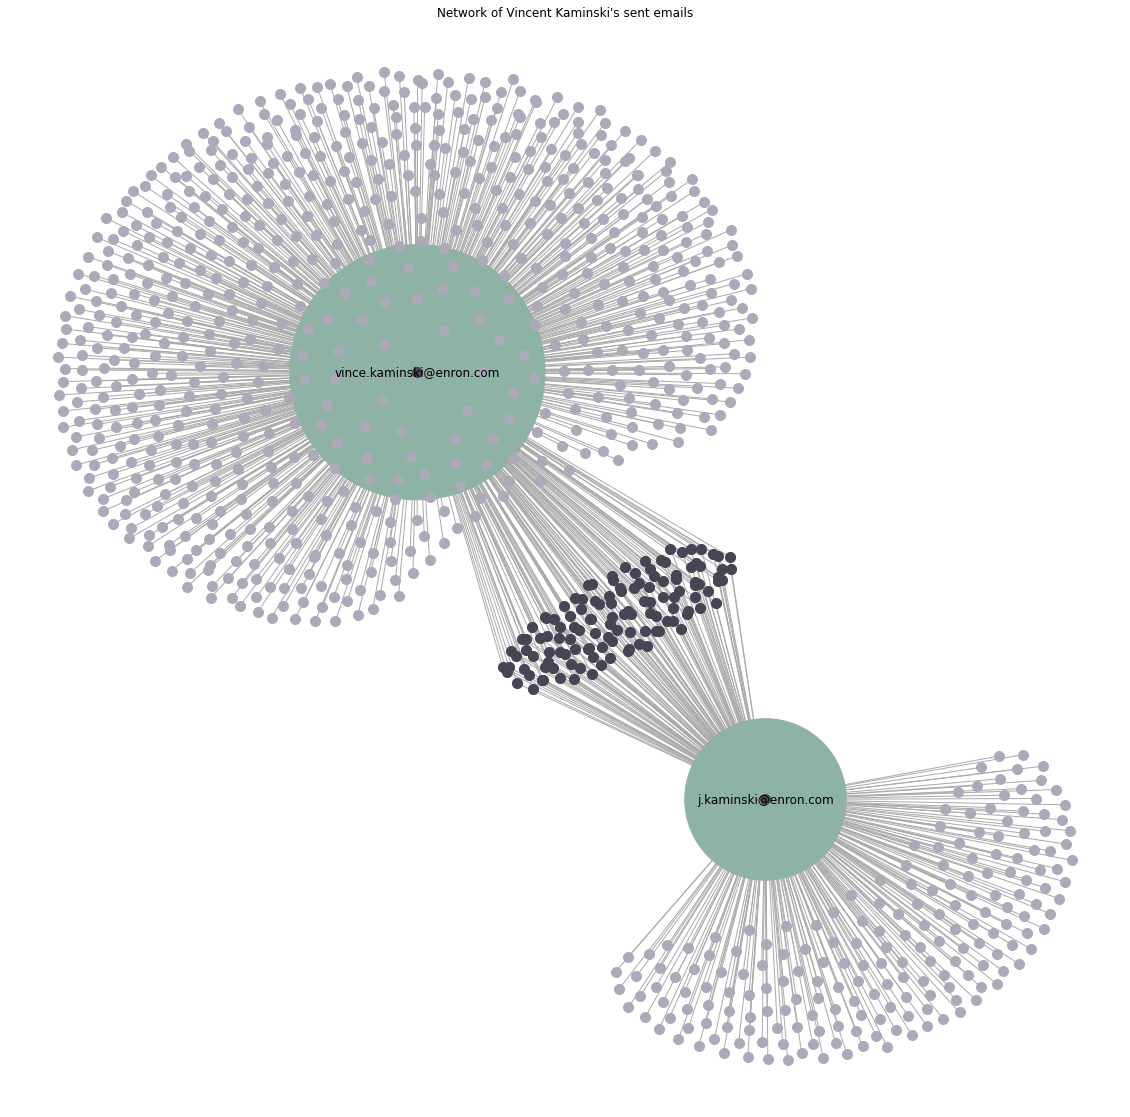

In [27]:
# create network graph for Kaminski
G_kam = nx.from_pandas_edgelist(kaminski_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_kam = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_kam = nx.spring_layout(G_kam, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_kam, layout_kam, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_kam = [node for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
size_kam = [G_kam.degree(node) * 80 for node in G_kam.nodes() if node in kaminski_edges['sender'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=sender_kam, node_size=size_kam, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=recipients_kam, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_kam = [node for node in G_kam.nodes() if node in kaminski_edges['recipient'].unique() and G_kam.degree(node) > 1]
nx.draw_networkx_nodes(G_kam, layout_kam, nodelist=high_degree_recipients_kam, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_kam = dict(zip(sender_kam, sender_kam))
nx.draw_networkx_labels(G_kam, layout_kam, labels=sender_dict_kam)

plt.axis('off')
plt.title('Network of Vincent Kaminski\'s sent emails')
plt.show()
fig_kam.savefig('../plots/kaminski_network1.png')

# Network Viz Lay

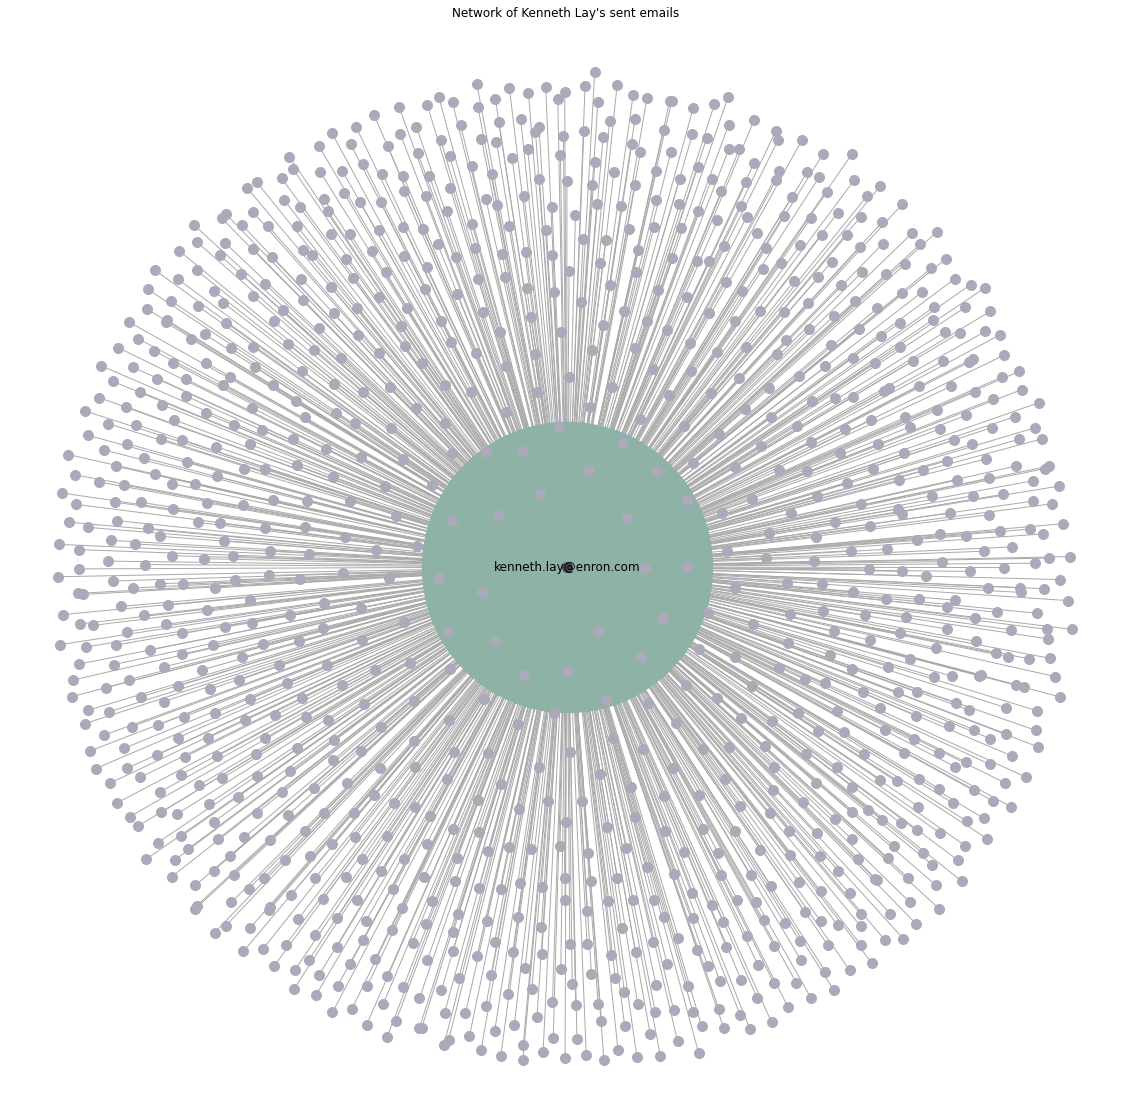

In [29]:
# create network graph for Kaminski
G_lay = nx.from_pandas_edgelist(lay_edges, 'sender', 'recipient', 
                                edge_attr='num_emails')
fig_lay = plt.figure(figsize=(20, 20))

# create a layout for the nodes
layout_lay = nx.spring_layout(G_lay, iterations=50)

# draw the edges
nx.draw_networkx_edges(G_lay, layout_lay, edge_color='#AAAAAA')

# create and draw sender nodes, sized according to their number of connections
sender_lay = [node for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
size_lay = [G_lay.degree(node) * 80 for node in G_lay.nodes() if node in lay_edges['sender'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=sender_lay, node_size=size_lay, node_color='#8EB2A5')

# create and draw all recipient nodes
recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique()]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=recipients_lay, node_size=100, node_color='#ACA9BB')

# create and draw popular recipients
high_degree_recipients_lay = [node for node in G_lay.nodes() if node in lay_edges['recipient'].unique() and G_lay.degree(node) > 1]
nx.draw_networkx_nodes(G_lay, layout_lay, nodelist=high_degree_recipients_lay, node_size=100, node_color='#474554')

# label the sender nodes
sender_dict_lay = dict(zip(sender_lay, sender_lay))
nx.draw_networkx_labels(G_lay, layout_lay, labels=sender_dict_lay)

plt.axis('off')
plt.title('Network of Kenneth Lay\'s sent emails')
plt.show()
fig_lay.savefig('../plots/lay_network.png')

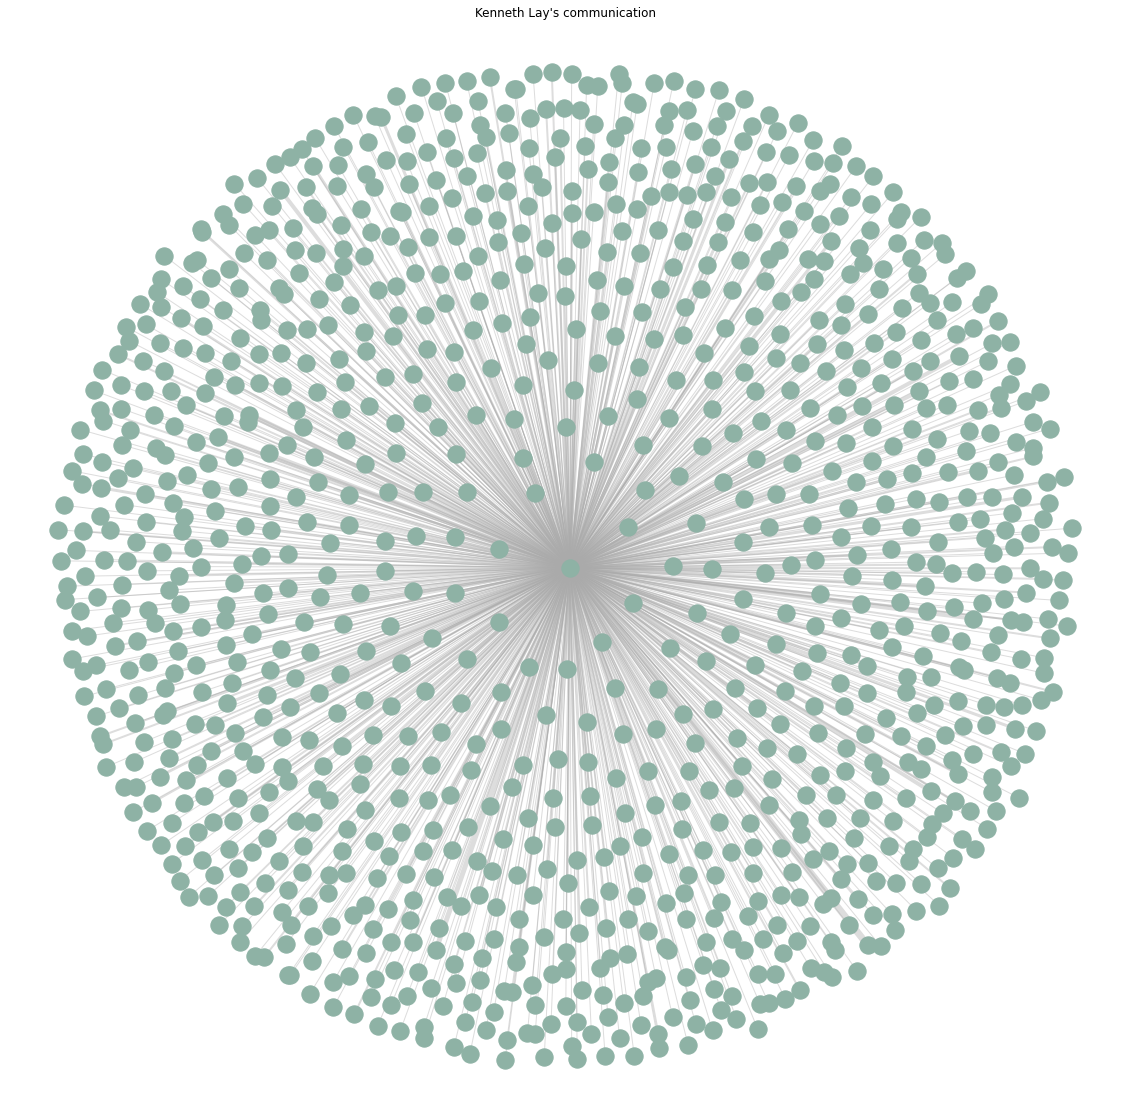

In [30]:
# create nodes and edges
emails = [i['num_emails'] for i in dict(G_lay.edges).values()]
persons = [i for i in dict(G_lay.nodes).keys()]
persons = {i:i for i in dict(G_lay.nodes).keys()}

fig_lay2 = plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G_lay,)
nx.draw_networkx_nodes(G_lay, pos, label=persons, node_color='#8EB2A5')
nx.draw_networkx_edges(G_lay, pos, width=emails, alpha=0.4, edge_color='#AAAAAA')

plt.axis('off')
plt.title('Kenneth Lay\'s communication')
fig_lay.savefig('../plots/lay_network.png')